**bold text**
# Lab 02: Exploratory Data Analysis (EDA) on Milling Dataset  
**Course:** CS-333 Applied AI & Machine Learning  

---

## 📌 Instructions
- Perform each task under its respective section.
- Use separate cells for each step.
- Write explanations in Markdown cells.
- Ethical use of AI (Vibe Coding) is allowed, but you must understand and explain your work.


# **Name:** Muhammad Zain Ul Abideen
# **Roll Number:** ME-1932
# **Section:** A

# 🔹 Task 1: Load the Dataset

In [325]:

# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

# Load Dataset (Update path if needed)

url = "https://raw.githubusercontent.com/AbbasHussain72/PNEC-CS-333-Applied-AI-ML/main/labs/Lab-02_/mill.csv"
df = pd.read_csv(url)


In [326]:

# Display last 5 rows

df.tail(5)

,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [327]:

# Check data types

df.dtypes

,0
S.no,int64
Unnamed: 1,object
case,int64
run,int64
VB,float64
time,int64
DOC,float64
feed,float64
material,int64
smcAC,float64


In [328]:

# Check dataset shape

df.shape

(180, 15)

In [329]:

# Dropping irrelevant coloumns

df = df.drop(['S.no','Unnamed: 1'], axis=1)
df.tail(5)

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [330]:

# Checking dataset shape again

df.shape

(180, 13)

# 🔹 Task 2: Data Cleaning

In [331]:

# Check missing values

print(df.isnull().sum())

case            0
run             0
VB             23
time            0
DOC             0
feed            0
material        0
smcAC           5
smcDC           1
vib_table       2
vib_spindle     4
AE_table        2
AE_spindle      1
dtype: int64


In [332]:
# Fill missing values

df = df.fillna(df.median(numeric_only=True))
df.count()

,0
case,180
run,180
VB,180
time,180
DOC,180
feed,180
material,180
smcAC,180
smcDC,180
vib_table,180


### ✍️ Explain how you handled missing values here.  
Ans: I used the method of 'Imputing median into null spaces' of each respctive coloumn from the article whose link was given in the readme file.  
This method prevents loss of data from the dataset. It is useful when there are small number of missing values, as in this case there were 38 missing values from a total of (180*13) = 2340.   
However, when there are many missing values, mean or median results can result in a loss of variation in the data.
Mean and median imputation can provide a good estimate of the missing values, respectively for normally distributed data, and skewed data.

In [333]:

# Check duplicates

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (13, 13)


In [334]:
# Number of rows before removing duplicate values

df.count()

,0
case,180
run,180
VB,180
time,180
DOC,180
feed,180
material,180
smcAC,180
smcDC,180
vib_table,180


In [335]:

# Remove duplicates

df = df.drop_duplicates()
df.head(5)

,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,1,2,0.28,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,1,3,0.28,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,1,5,0.28,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [336]:
# Number of rows after removing duplicate values
df.count()

,0
case,167
run,167
VB,167
time,167
DOC,167
feed,167
material,167
smcAC,167
smcDC,167
vib_table,167


In [337]:
# Shape of dataset

df.shape

(167, 13)

# 🔹 Task 3: Statistical Analysis

## 1️⃣ Center (Mean, Median, Mode)

In [338]:
df1 = df.drop(['case','material'], axis=1)
df1.head(5)

,run,VB,time,DOC,feed,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,0.00,2,1.5,0.5,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,0.28,4,1.5,0.5,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,0.28,6,1.5,0.5,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,0.11,7,1.5,0.5,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,0.28,11,1.5,0.5,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474


In [339]:
# Mean

df1.mean()



,0
run,7.167665
VB,0.330359
time,26.113772
DOC,1.032934
feed,0.372754
smcAC,-0.165095
smcDC,1.336458
vib_table,0.079543
vib_spindle,0.287340
AE_table,0.100470


In [340]:
# Median

df1.median()

,0
run,6.000000
VB,0.280000
time,19.000000
DOC,0.750000
feed,0.250000
smcAC,-0.183105
smcDC,1.372070
vib_table,0.068359
vib_spindle,0.285645
AE_table,0.101318


In [341]:
# Mode

df1.mode()

,run,VB,time,DOC,feed,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,0.28,3,0.75,0.25,-0.183105,1.381836,0.061035,0.285645,0.101318,0.110474


## Checking Distribution of Tool wear (VB)

Mean of VB: 0.33035928143712573
Median of VB: 0.28
Difference (Mean - Median): 0.0503592814371257
VB is positively skewed (mean > median).


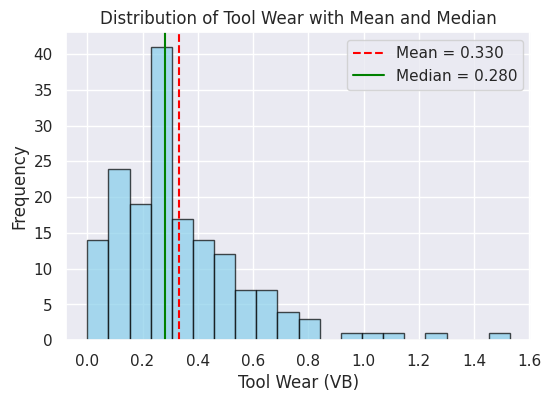

In [342]:
# Computing difference in mean and median of VB

mean_VB = df1['VB'].mean()
median_VB = df1['VB'].median()

print("Mean of VB:", mean_VB)
print("Median of VB:", median_VB)

difference = mean_VB - median_VB

print("Difference (Mean - Median):", difference)

if difference > 0:
    print("VB is positively skewed (mean > median).")
elif difference < 0:
    print("VB is negatively skewed (mean < median).")
else:
    print("VB is roughly symmetric (mean ≈ median).")

# Plot

plt.figure(figsize=(6,4))
plt.hist(df1['VB'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_VB, color='red', linestyle='--', label=f'Mean = {mean_VB:.3f}')
plt.axvline(median_VB, color='green', linestyle='-', label=f'Median = {median_VB:.3f}')
plt.xlabel('Tool Wear (VB)')
plt.ylabel('Frequency')
plt.title('Distribution of Tool Wear with Mean and Median')
plt.legend()
plt.show()

### ✍️ Is tool wear normally distributed? Is mean close to median?  
Ans: Tool Wear is positively skewed as mean is greater than median as shown in the histogram above.

## 2️⃣ Spread (Variation)

In [343]:

# Variance

variance = df1.var()
print(variance)

run             24.694611
VB               0.059655
time           542.547219
DOC              0.132945
feed             0.015714
smcAC            0.123088
smcDC            0.035860
vib_table        0.001333
vib_spindle      0.000450
AE_table         0.000610
AE_spindle       0.000449
dtype: float64


In [344]:
# Range

range_df1 = pd.DataFrame({
    'Min': df1.min(numeric_only=True),
    'Max': df1.max(numeric_only=True),
    'Range': df1.max(numeric_only=True) - df1.min(numeric_only=True)
})

print(range_df1)

                      Min         Max       Range
run          1.000000e+00   23.000000   22.000000
VB           0.000000e+00    1.530000    1.530000
time         0.000000e+00  105.000000  105.000000
DOC          7.500000e-01    1.500000    0.750000
feed         2.500000e-01    0.500000    0.250000
smcAC       -7.983398e-01    0.378418    1.176758
smcDC        2.084677e-33    1.450195    1.450195
vib_table    1.054677e-08    0.292969    0.292969
vib_spindle  2.075195e-01    0.391846    0.184326
AE_table     4.074626e-11    0.149536    0.149536
AE_spindle   2.700255e-06    0.181274    0.181272


In [345]:

# IQR

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

df1.shape

run             7.000000
VB              0.270000
time           31.500000
DOC             0.750000
feed            0.250000
smcAC           0.747070
smcDC           0.041504
vib_table       0.021973
vib_spindle     0.023193
AE_table        0.021973
AE_spindle      0.025940
dtype: float64


(124, 11)

## Feature with highest variability

In [346]:
# Feature showing maximum variability
max_var_feature = variance.idxmax()
max_var_value = variance.max()
print(f"Highest variability by variance: {max_var_feature} ({max_var_value})")

ranges = df.max() - df.min()
max_range_feature = ranges.idxmax()
print(f"Highest variability by range: {max_range_feature} ({ranges[max_range_feature]})")

max_IQR_feature = IQR.idxmax()
print(f"Highest variability by IQR: {max_IQR_feature} ({IQR[max_IQR_feature]})")


Highest variability by variance: time (542.5472188153815)
Highest variability by range: time (105.0)
Highest variability by IQR: time (31.5)


## Checking highest variability in sensors only

In [347]:
# For Sensor coloumns only
sensor_cols = ['smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']
sensors_df = df[sensor_cols]

# Variance
variances = sensors_df.var()
max_var_sensor = variances.idxmax()
print(f"Highest variability by variance (sensors only): {max_var_sensor} ({variances[max_var_sensor]:.3f})")

# Range
ranges = sensors_df.max() - sensors_df.min()
max_range_sensor = ranges.idxmax()
print(f"Highest variability by range (sensors only): {max_range_sensor} ({ranges[max_range_sensor]:.3f})")

# IQR
Q1 = sensors_df.quantile(0.25)
Q3 = sensors_df.quantile(0.75)
IQR = Q3 - Q1
max_IQR_sensor = IQR.idxmax()
print(f"Highest variability by IQR (sensors only): {max_IQR_sensor} ({IQR[max_IQR_sensor]:.3f})")


Highest variability by variance (sensors only): smcAC (0.123)
Highest variability by range (sensors only): smcDC (1.450)
Highest variability by IQR (sensors only): smcAC (0.747)


### ✍️ Which sensor shows highest variability?  
Ans: Among all features, time shows highest variability with respect to variance, range and IQR.  

In sensors smcAC is consistently variable with respect to variance and IQR, but smcDC has highest variability with respect to range, meaning that it extreme values. Although they are extreme, but their spread is less then smcAC.

Final answer: smcAC has highest variability among all sensors.

## 3️⃣ Shape (Distribution)

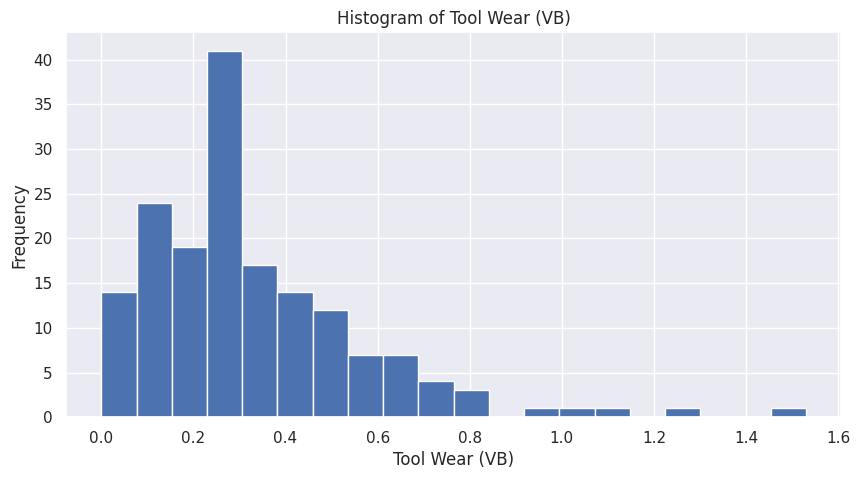

In [348]:

# Histogram of Tool Wear

df['VB'].plot(kind='hist', bins=20, figsize=(10,5))
plt.title("Histogram of Tool Wear (VB)")
plt.xlabel("Tool Wear (VB)")
plt.show()

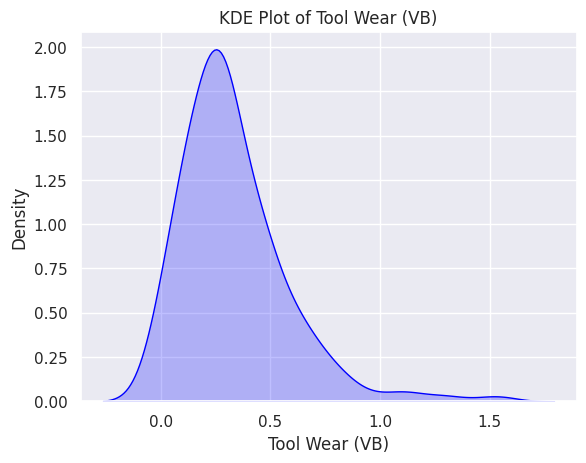

In [349]:

# KDE Plot

sns.kdeplot(df['VB'], fill=True, color='blue')
plt.title('KDE Plot of Tool Wear (VB)')
plt.xlabel('Tool Wear (VB)')
plt.ylabel('Density')
plt.show()

### ✍️ Is distribution symmetric, skewed, or multi-modal?  
Distribution of tool wear is right skewed. as show by histogram and KDE plot.

## 4️⃣ Outlier Detection

<Axes: xlabel='VB'>

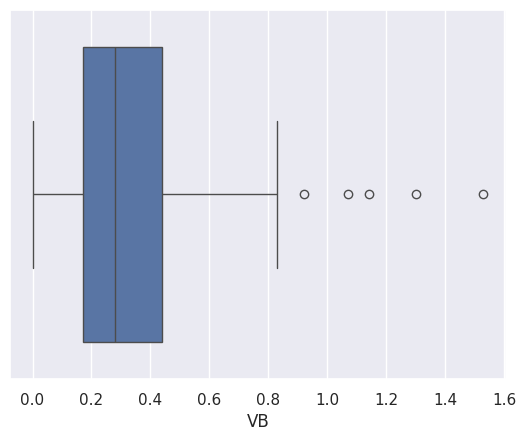

In [350]:

# Boxplot, IQR, Z-modified score

sns.boxplot(x=df['VB'])

## Summary of dataset before removing outliers:

In [351]:
df2 = df.drop(['case','material'], axis=1)
df2.describe()

,run,VB,time,DOC,feed,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,1.670000e+02,1.670000e+02,167.000000,1.670000e+02,167.000000
mean,7.167665,0.330359,26.113772,1.032934,0.372754,-0.165095,1.336458e+00,7.954306e-02,0.287340,1.004704e-01,0.123901
std,4.969367,0.244244,23.292643,0.364616,0.125356,0.350839,1.893680e-01,3.651635e-02,0.021220,2.469227e-02,0.021187
min,1.000000,0.000000,0.000000,0.750000,0.250000,-0.798340,2.084677e-33,1.054677e-08,0.207520,4.074626e-11,0.000003
25%,3.000000,0.170000,7.500000,0.750000,0.250000,-0.544434,1.350098e+00,6.103516e-02,0.274658,9.277344e-02,0.110474
50%,6.000000,0.280000,19.000000,0.750000,0.250000,-0.183105,1.372070e+00,6.835938e-02,0.285645,1.013184e-01,0.122070
75%,10.000000,0.440000,39.000000,1.500000,0.500000,0.202637,1.391602e+00,8.300781e-02,0.297852,1.147461e-01,0.136414
max,23.000000,1.530000,105.000000,1.500000,0.500000,0.378418,1.450195e+00,2.929688e-01,0.391846,1.495361e-01,0.181274


In [352]:
# Modified Z-Score

data = df2['VB']
median = np.median(data)
mad = np.median(np.abs(data - median))
modified_z_scores = 0.6745 * (data - median) / mad
threshold = 3.5
outliers = data[np.abs(modified_z_scores) > threshold]

print('Outliers by MAD: \n',outliers)

df2 = df2[np.abs(modified_z_scores) <= threshold]

print("Shape after removing outliers:", df2.shape)

Outliers by MAD: 
 149    1.07
150    1.30
151    1.53
160    1.14
Name: VB, dtype: float64
Shape after removing outliers: (163, 11)


## Summary of dataset after removing outliers:

In [353]:
df2.describe()

,run,VB,time,DOC,feed,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,1.630000e+02,1.630000e+02,163.000000,1.630000e+02,163.000000
mean,7.024540,0.307546,25.840491,1.039877,0.374233,-0.160594,1.335374e+00,7.981751e-02,0.287719,1.005545e-01,0.124107
std,4.935324,0.196199,23.477840,0.366337,0.125383,0.349460,1.915389e-01,3.689070e-02,0.021328,2.498288e-02,0.021391
min,1.000000,0.000000,0.000000,0.750000,0.250000,-0.798340,2.084677e-33,1.054677e-08,0.207520,4.074626e-11,0.000003
25%,3.000000,0.165000,7.000000,0.750000,0.250000,-0.524902,1.347656e+00,6.103516e-02,0.275269,9.277344e-02,0.109863
50%,6.000000,0.280000,19.000000,0.750000,0.250000,-0.183105,1.372070e+00,6.835938e-02,0.285645,1.019287e-01,0.122070
75%,10.000000,0.430000,39.000000,1.500000,0.500000,0.202637,1.391602e+00,8.300781e-02,0.298462,1.147461e-01,0.137329
max,23.000000,0.920000,105.000000,1.500000,0.500000,0.378418,1.450195e+00,2.929688e-01,0.391846,1.495361e-01,0.181274



### ✍️
- Which method did you use (IQR or Modified Z-score)?   
Modified Z-score method
- Why?   
Because IQR removes all the values that are out of range of Tukey outlier rule, which can be natural in this case as tool wear can be extreme depending upon the time of its use. so modified Z score method works better in this case because it is more robust to extreme values.
- How many outliers were removed?   
Four outliers were removed.   
149     1.07  
150     1.30  
151     1.53  
160     1.14  
- How did it affect statistics?  
Mean and standard deviation have reduced slightly. Median remains un affected. Minimum and maximum values are also unaffected accept the maximum value of tool wear has decreased a bit (from 1.53 to 0.92)


# 🔹 Task 4: Correlation Analysis

,run,VB,time,DOC,feed,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
run,1.000000,0.609439,0.946438,-0.231857,-0.112193,-0.007846,0.202374,0.146114,-0.214603,0.110157,0.047629
VB,0.609439,1.000000,0.558728,0.052470,0.028153,-0.005535,0.127313,-0.085644,-0.221853,0.044873,-0.075942
time,0.946438,0.558728,1.000000,-0.252427,-0.146304,0.021498,0.206000,0.245306,-0.268115,0.185189,0.157764
DOC,-0.231857,0.052470,-0.252427,1.000000,0.168657,-0.000610,-0.145791,-0.100927,0.237928,0.020947,-0.068966
feed,-0.112193,0.028153,-0.146304,0.168657,1.000000,0.080063,-0.200261,-0.243671,0.209469,-0.133696,-0.218552
smcAC,-0.007846,-0.005535,0.021498,-0.000610,0.080063,1.000000,-0.027234,0.169233,0.004805,-0.031197,-0.037236
smcDC,0.202374,0.127313,0.206000,-0.145791,-0.200261,-0.027234,1.000000,0.097687,-0.117422,0.195929,0.304341
vib_table,0.146114,-0.085644,0.245306,-0.100927,-0.243671,0.169233,0.097687,1.000000,-0.066474,0.264803,0.381468
vib_spindle,-0.214603,-0.221853,-0.268115,0.237928,0.209469,0.004805,-0.117422,-0.066474,1.000000,-0.059957,-0.131227
AE_table,0.110157,0.044873,0.185189,0.020947,-0.133696,-0.031197,0.195929,0.264803,-0.059957,1.000000,0.742301


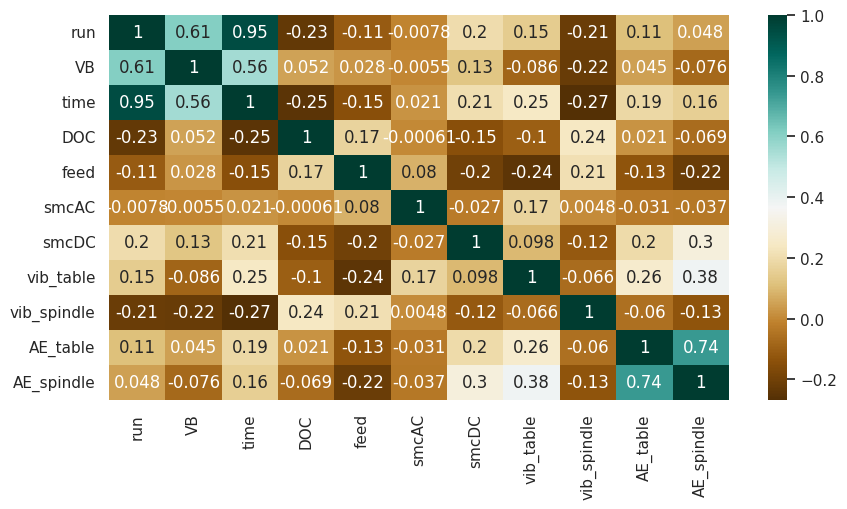

In [354]:
# Correlation Matrix and Heat Map

plt.figure(figsize=(10,5))
c= df2.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c


### ✍️
- Does tool wear correlate strongly with vibration?  
No. Vibration has very little impact on tool wear.
- Which feature is most predictive?  
Based on correlation analysis, run and time are the most predictive features of tool wear, because they show the strongest positive correlation with VB. Vibration features have very low correlation and are not strongly predictive

# 🔹 Task 5: Additional Visualization

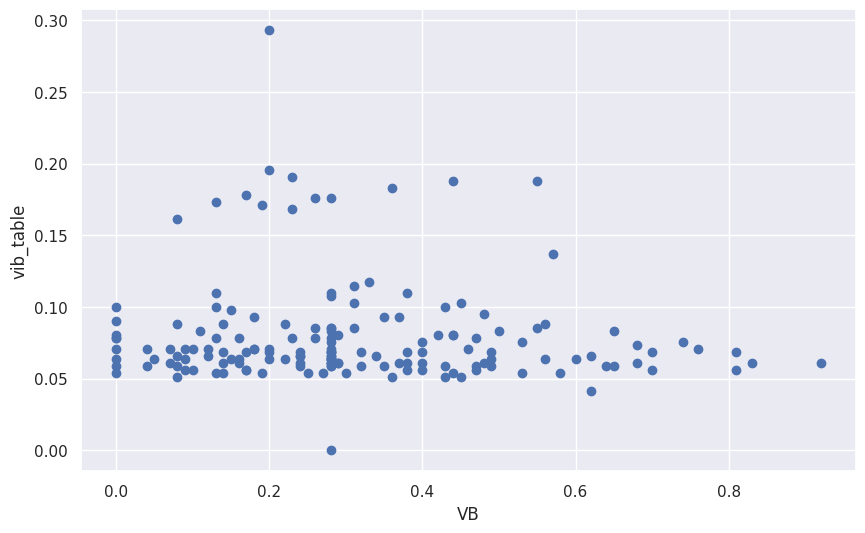

In [355]:

# Scatter Plot: Example (Tool Wear vs Vibration)

# Tool Wear vs Table Vibration
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df2['VB'], df2['vib_table'])
ax.set_xlabel('VB')
ax.set_ylabel('vib_table')
plt.show()

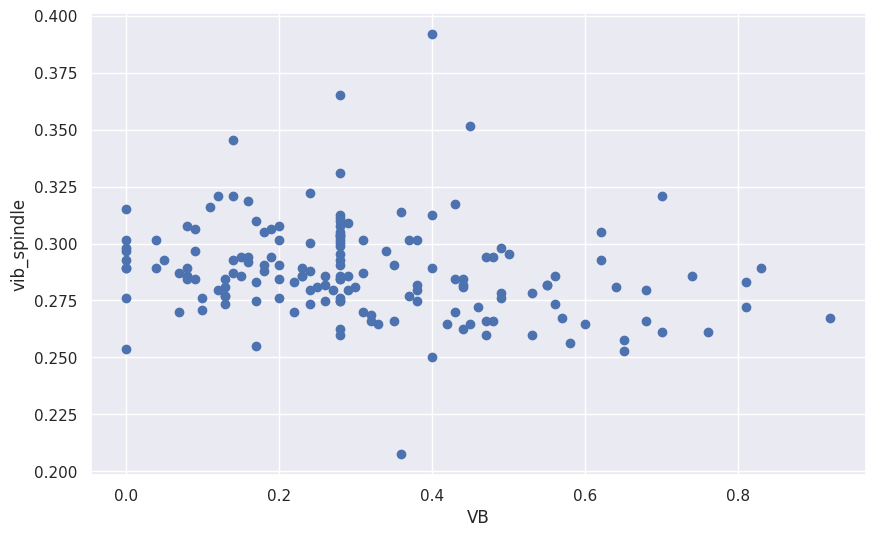

In [356]:
# Tool Wear vs Spindle Vibration
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df2['VB'], df2['vib_spindle'])
ax.set_xlabel('VB')
ax.set_ylabel('vib_spindle')
plt.show()

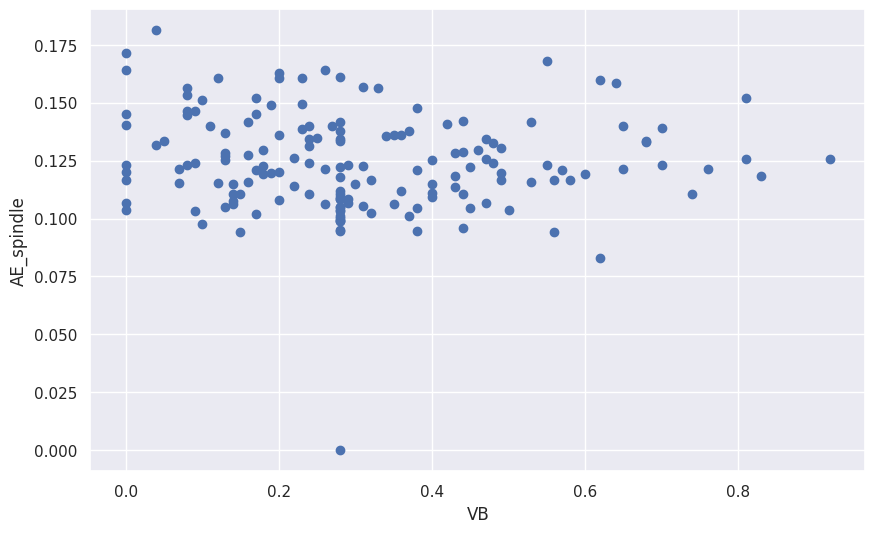

In [357]:
# Tool Wear vs Spindle acoustic emmission
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df2['VB'], df2['AE_spindle'])
ax.set_xlabel('VB')
ax.set_ylabel('AE_spindle')
plt.show()

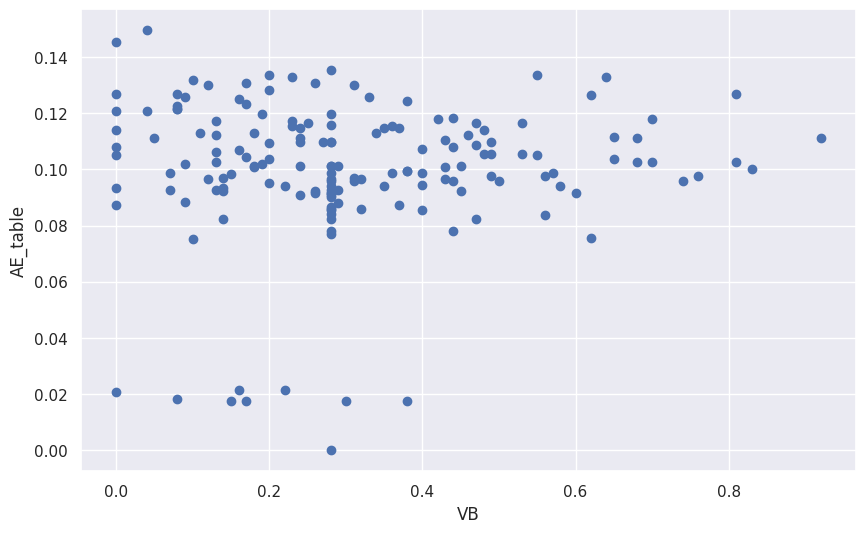

In [358]:
# Tool Wear vs Table acoustic emmission
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df2['VB'], df2['AE_table'])
ax.set_xlabel('VB')
ax.set_ylabel('AE_table')
plt.show()

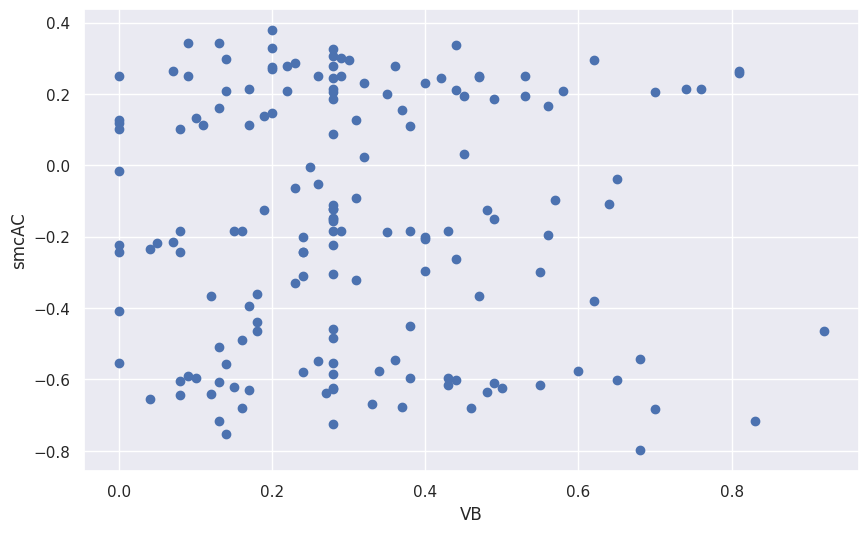

In [359]:
# Tool Wear vs AC spindle motor current (smcAC)
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df2['VB'], df2['smcAC'])
ax.set_xlabel('VB')
ax.set_ylabel('smcAC')
plt.show()

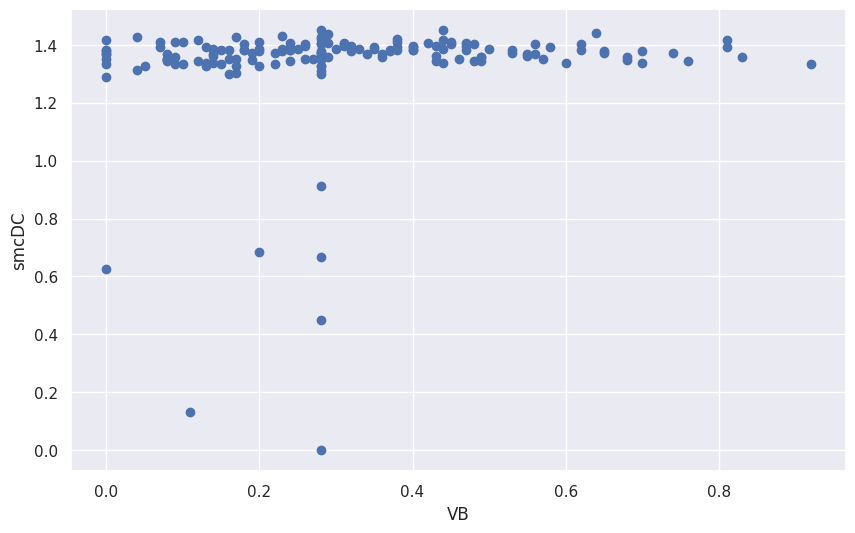

In [360]:
# Tool Wear vs DC spindle motor current (smcDC)
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df2['VB'], df2['smcDC'])
ax.set_xlabel('VB')
ax.set_ylabel('smcDC')
plt.show()

## Co-efficient of Variation to check stability of sensor readings  
The coefficient of variation (CoV) is a measure of relative variability of a dataset. It tells you how spread out the values are compared to the mean, which is very useful when comparing variability between features that have different units or scales.  
High CoV → the data fluctuates a lot relative to its mean → unstable/variable.

Low CoV → data is more consistent → stable.

In [361]:
df2[['smcAC','smcDC','vib_table','vib_spindle','AE_table','AE_spindle']].describe()

,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
count,163.000000,1.630000e+02,1.630000e+02,163.000000,1.630000e+02,163.000000
mean,-0.160594,1.335374e+00,7.981751e-02,0.287719,1.005545e-01,0.124107
std,0.349460,1.915389e-01,3.689070e-02,0.021328,2.498288e-02,0.021391
min,-0.798340,2.084677e-33,1.054677e-08,0.207520,4.074626e-11,0.000003
25%,-0.524902,1.347656e+00,6.103516e-02,0.275269,9.277344e-02,0.109863
50%,-0.183105,1.372070e+00,6.835938e-02,0.285645,1.019287e-01,0.122070
75%,0.202637,1.391602e+00,8.300781e-02,0.298462,1.147461e-01,0.137329
max,0.378418,1.450195e+00,2.929688e-01,0.391846,1.495361e-01,0.181274


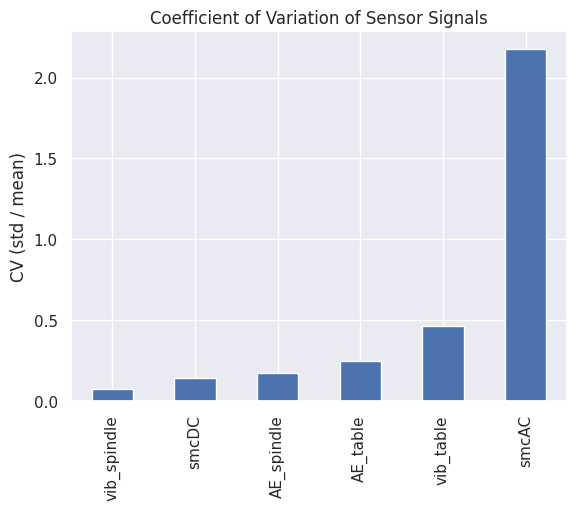

In [362]:
sensor_cols = ['smcAC','smcDC','vib_table','vib_spindle','AE_table','AE_spindle']

cv = df2[sensor_cols].std() / df2[sensor_cols].mean().abs()

cv.sort_values().plot(kind='bar')
plt.title('Coefficient of Variation of Sensor Signals')
plt.ylabel('CV (std / mean)')
plt.show()



## 🧠 Engineering Thinking Questions
1. Which parameter affects tool wear the most?  

2. Which sensor signal is most stable?  

3. Can tool wear be predicted from sensor data?  


Answers:  
Ans (1): Time is the feature that affects tool wear the most. (From correlation heatmap)  
Ans (2): Spindle vibration sensor signal is the most stable one. (From Scatterplots and coefficient of variability (as vib_spindle has least cov.))  
Ans (3): No. This is beacuse correlation is low between tool wear and sensor data, so sensor data alone is not enough to predict tool wear reliably.  
Machine parameters like run and time dominate tool wear, while vibration and acoustic signals are less predictive.
